In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [6]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [7]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

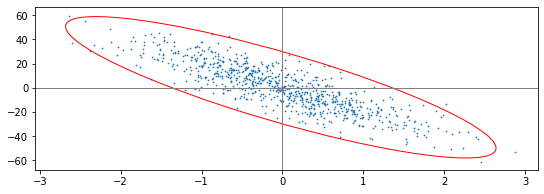

In [45]:
np.random.seed(0)

mu = 0, 0
scale = 1, 20
dependency = [[0.9, -0.8], [0.1, -0.6]]

fig, axs = plt.subplots(1, 1, figsize=(9, 3))

x, y = get_correlated_dataset(800, dependency, mu, scale)
axs.scatter(x, y, s=0.5)

axs.axvline(c='grey', lw=1)
axs.axhline(c='grey', lw=1)

confidence_ellipse(x, y, axs, edgecolor='red')

axs.scatter(mu[0], mu[1], c='red', s=3)
plt.show()

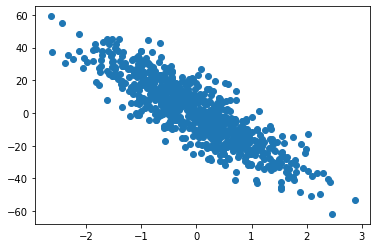

In [46]:
plt.scatter(x, y)
plt.show()

In [47]:
X = np.stack([x, y])
X = np.transpose(X)

print(X.shape)

(800, 2)


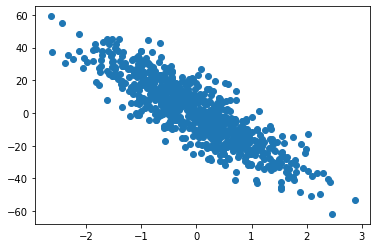

In [48]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

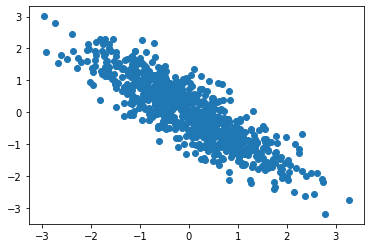

In [49]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X=X)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [57]:
pca = decomposition.PCA(n_components=1)
pca.fit(X)
X_transformed = pca.transform(X)

print(X_transformed.shape)

(800, 1)


In [58]:
X_recomposed = pca.inverse_transform(X_transformed)

print(X_recomposed.shape)

(800, 2)


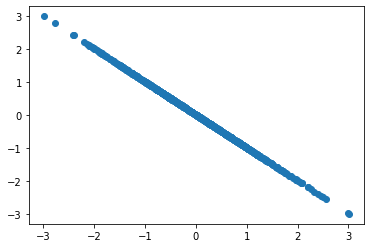

In [60]:
plt.scatter(X_recomposed[:, 0], X_recomposed[:, 1])
plt.show()